In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the datasets
df_pre_k_riders = pd.read_csv('/content/PreK_Riders_by_Transportation_Site_20241020.csv')
df_routes = pd.read_csv('/content/Routes_by_Transportation_Sites_20241020.csv')
df_transport_sites = pd.read_csv('/content/Transportation_Sites_20241020 (1).csv')

In [4]:
# Displaying information about each dataset.
print("Pre-K Riders Dataset Overview:")
df_pre_k_riders.info()
print("\nFirst 5 Rows:")
print(df_pre_k_riders.head())

print("\nRoutes Dataset Overview:")
df_routes.info()
print("\nFirst 5 Rows:")
print(df_routes.head())

print("\nTransportation Sites Dataset Overview:")
df_transport_sites.info()
print("\nFirst 5 Rows:")
print(df_transport_sites.head())

Pre-K Riders Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   School_Year       1628 non-null   object
 1   OPT_Code          1628 non-null   object
 2   Site_Name         1628 non-null   object
 3   School_Name       1624 non-null   object
 4   Number_of_Riders  1628 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 63.7+ KB

First 5 Rows:
  School_Year OPT_Code                                Site_Name  \
0   2017-2018     C225              Highbridge Advisory Council   
1   2019-2020    C275A              Highbridge Advisory Council   
2   2019-2020    C275B              Highbridge Advisory Council   
3   2019-2020     C278              Highbridge Advisory Council   
4   2017-2018     E011  Crossroads School for Child Development   

                               School_Name  Number_of_Riders  
0        

**Data Cleaning and Exploration**

In [5]:
# Handling missing values and exploring data relationships

# Checking for missing values in each dataset
print("\nChecking for missing values in Pre-K Riders dataset:")
print(df_pre_k_riders.isnull().sum())

print("\nChecking for missing values in Routes dataset:")
print(df_routes.isnull().sum())

print("\nChecking for missing values in Transportation Sites dataset:")
print(df_transport_sites.isnull().sum())


Checking for missing values in Pre-K Riders dataset:
School_Year         0
OPT_Code            0
Site_Name           0
School_Name         4
Number_of_Riders    0
dtype: int64

Checking for missing values in Routes dataset:
School_Year     0
Route_Number    0
OPT_Code        0
dtype: int64

Checking for missing values in Transportation Sites dataset:
School_Year                         0
OPT_Code                            0
Name                                0
Affiliation                      2297
Site_Type                           0
Street_Address                      0
City                                0
State                              10
Zip                                10
Longitude                           0
Latitude                            0
Door_To_Door_Service                0
Stop_To_School_Service              0
Common_Carrier_Svc_Metrocards       0
Site_Reimbursement                  0
Mid_Day_Service                     0
D2D_Late_Day_Programs               0


In [6]:
# Filling missing values in numerical columns with the mean
for column in df_transport_sites.select_dtypes(include=np.number):
  df_transport_sites[column].fillna(df_transport_sites[column].mean(), inplace=True)

# Filling missing values in categorical columns with the mode
for column in df_transport_sites.select_dtypes(include='object'):
 df_transport_sites[column].fillna(df_transport_sites[column].mode()[0], inplace=True)

print(df_transport_sites.isnull().sum())

School_Year                      0
OPT_Code                         0
Name                             0
Affiliation                      0
Site_Type                        0
Street_Address                   0
City                             0
State                            0
Zip                              0
Longitude                        0
Latitude                         0
Door_To_Door_Service             0
Stop_To_School_Service           0
Common_Carrier_Svc_Metrocards    0
Site_Reimbursement               0
Mid_Day_Service                  0
D2D_Late_Day_Programs            0
S2S_Late_Day_Programs            0
dtype: int64


<ipython-input-6-1d0812497cb1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transport_sites[column].fillna(df_transport_sites[column].mean(), inplace=True)
<ipython-input-6-1d0812497cb1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [7]:
# Filling missing values in numerical columns with the mean
for column in df_pre_k_riders.select_dtypes(include=np.number):
  df_pre_k_riders[column].fillna(df_pre_k_riders[column].mean(), inplace=True)

# Filling missing values in categorical columns with the mode
for column in df_pre_k_riders.select_dtypes(include='object'):
  df_pre_k_riders[column].fillna(df_pre_k_riders[column].mode()[0], inplace=True)

print(df_pre_k_riders.isnull().sum())

School_Year         0
OPT_Code            0
Site_Name           0
School_Name         0
Number_of_Riders    0
dtype: int64


<ipython-input-7-8de961389a32>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pre_k_riders[column].fillna(df_pre_k_riders[column].mean(), inplace=True)
<ipython-input-7-8de961389a32>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

**Data Exploration, Analysis, and Outlier Detection**


Basic Statistics for Pre-K Riders Dataset:
       Number_of_Riders
count       1628.000000
mean          41.732187
std           50.436784
min            1.000000
25%            6.000000
50%           19.000000
75%           65.000000
max          377.000000

Outlier Detection and Visualization

Outliers in Number_of_Riders:
     School_Year OPT_Code                                          Site_Name  \
36     2015-2016     C028                      Positive Beginnings Preschool   
43     2017-2018     C544                            Bronx Preschool Program   
65     2019-2020     C028                      Positive Beginnings Preschool   
76     2015-2016     C117                      SUNSHINE DEVELOPMENTAL SCHOOL   
120    2015-2016     C244                     Guild for Exceptional Children   
126    2015-2016     C266                                              HIDEC   
149    2015-2016     C329                         Kennedy Child Study Center   
212    2015-2016     C568       

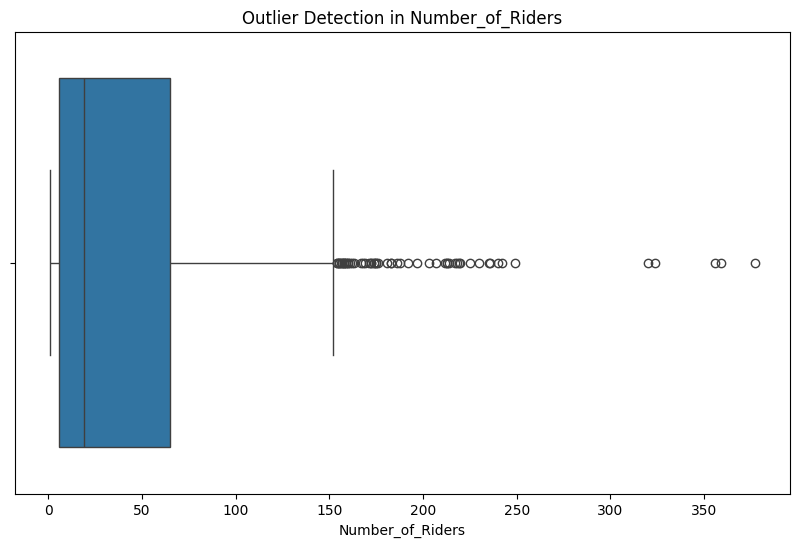

In [8]:
# Basic statistics and exploratory data analysis (EDA)
print("\nBasic Statistics for Pre-K Riders Dataset:")
print(df_pre_k_riders.describe())

# Outlier Detection and Visualization
print("\nOutlier Detection and Visualization")

# Using IQR method to detect outliers in numeric columns of Pre-K Riders dataset
numeric_columns = df_pre_k_riders.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    Q1 = df_pre_k_riders[column].quantile(0.25)
    Q3 = df_pre_k_riders[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_pre_k_riders[(df_pre_k_riders[column] < lower_bound) | (df_pre_k_riders[column] > upper_bound)]
    print(f"\nOutliers in {column}:")
    print(outliers)

    # Visualization of Outliers using Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_pre_k_riders[column])
    plt.title(f'Outlier Detection in {column}')
    plt.xlabel(column)
    plt.show()

**SQL Queries for Data Extraction and Transformation**

In [9]:
import sqlite3
# Create a SQLite database and load the data into it
conn = sqlite3.connect('nyc_transportation.db')
df_pre_k_riders.to_sql('pre_k_riders', conn, if_exists='replace', index=False)
df_routes.to_sql('routes', conn, if_exists='replace', index=False)
df_transport_sites.to_sql('transport_sites', conn, if_exists='replace', index=False)

# Writing SQL queries to extract meaningful information
print("\nExecuting SQL Queries:")
# Query 1: Retrieve all records from Pre-K Riders table
query_1 = "SELECT * FROM pre_k_riders LIMIT 5;"
print("\nQuery 1 Result:")
print(pd.read_sql(query_1, conn))

# Query 2: Count the number of unique routes
query_2 = "SELECT COUNT(DISTINCT Route_Number) AS unique_routes FROM routes;"
print("\nQuery 2 Result:")
print(pd.read_sql(query_2, conn))

# Query 3: Join Pre-K Riders and Routes to find route details for each rider
query_3 = """
SELECT pr.*, r.Route_Number
FROM pre_k_riders pr
JOIN routes r ON pr.OPT_Code = r.OPT_Code;
"""
print("\nQuery 3 Result:")
print(pd.read_sql(query_3, conn).head())

# Query 4: Aggregate the number of riders per transportation site
query_4 = """
SELECT ts.Name AS Site_Name, COUNT(pr.OPT_Code) AS num_riders
FROM transport_sites ts
JOIN pre_k_riders pr ON ts.OPT_Code = pr.OPT_Code
GROUP BY ts.Name;
"""
print("\nQuery 4 Result:")
print(pd.read_sql(query_4, conn))

# Query 5: Filter routes with more than 10 riders
query_5 = """
SELECT r.Route_Number, COUNT(pr.OPT_Code) AS num_riders
FROM routes r
JOIN pre_k_riders pr ON r.OPT_Code = pr.OPT_Code
GROUP BY r.Route_Number
HAVING num_riders > 10;
"""
print("\nQuery 5 Result:")
print(pd.read_sql(query_5, conn))

# Query 6: Join Pre-K Riders and Transportation Sites to explore site affiliations for each rider
query_6 = """
SELECT pr.*, ts.Affiliation, ts.Site_Type
FROM pre_k_riders pr
JOIN transport_sites ts ON pr.OPT_Code = ts.OPT_Code;
"""
print("\nQuery 6 Result:")
print(pd.read_sql(query_6, conn).head())

# Query 7: Average number of riders per affiliation
query_7 = """
SELECT ts.Affiliation, AVG(pr.Number_of_Riders) AS avg_riders
FROM pre_k_riders pr
JOIN transport_sites ts ON pr.OPT_Code = ts.OPT_Code
GROUP BY ts.Affiliation;
"""
print("\nQuery 7 Result:")
print(pd.read_sql(query_7, conn))

# Query 8: List of routes by the type of site they serve
query_8 = """
SELECT r.Route_Number, ts.Site_Type, COUNT(pr.OPT_Code) AS num_riders
FROM routes r
JOIN pre_k_riders pr ON r.OPT_Code = pr.OPT_Code
JOIN transport_sites ts ON pr.OPT_Code = ts.OPT_Code
GROUP BY r.Route_Number, ts.Site_Type;
"""
print("\nQuery 8 Result:")
print(pd.read_sql(query_8, conn))



Executing SQL Queries:

Query 1 Result:
  School_Year OPT_Code                                Site_Name  \
0   2017-2018     C225              Highbridge Advisory Council   
1   2019-2020    C275A              Highbridge Advisory Council   
2   2019-2020    C275B              Highbridge Advisory Council   
3   2019-2020     C278              Highbridge Advisory Council   
4   2017-2018     E011  Crossroads School for Child Development   

                               School_Name  Number_of_Riders  
0                         Marshall England                50  
1              Highbridge Advisory Council                67  
2              Highbridge Advisory Council                16  
3              Highbridge Advisory Council                12  
4  Crossroads School for Child Development                 2  

Query 2 Result:
   unique_routes
0          13947

Query 3 Result:
Empty DataFrame
Columns: [School_Year, OPT_Code, Site_Name, School_Name, Number_of_Riders, Route_Number]
Index

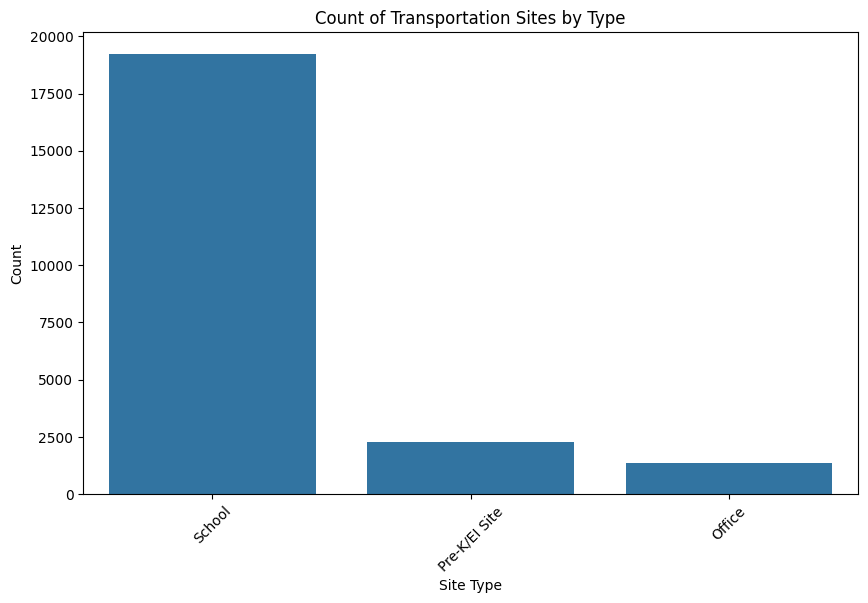

In [10]:
# Visualization for the Count of sites by type
site_type_count = df_transport_sites['Site_Type'].value_counts().reset_index()
site_type_count.columns = ['Site_Type', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Site_Type', y='Count', data=site_type_count)
plt.xticks(rotation=45)
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.title('Count of Transportation Sites by Type')
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming df_pre_k_riders, df_routes, and df_transport_sites are already loaded

def convert_to_numerical(df):
  """Converts all values in a DataFrame to numerical form.

  Args:
    df: The pandas DataFrame to convert.

  Returns:
    The DataFrame with all values converted to numerical form.
  """

  for column in df.columns:
    if df[column].dtype == object:  # Checking if the column contains categorical data
      le = LabelEncoder()
      df[column] = le.fit_transform(df[column])
  return df

# Converting all datasets to numerical form
df_pre_k_riders_numerical = convert_to_numerical(df_pre_k_riders.copy())
df_routes_numerical = convert_to_numerical(df_routes.copy())
df_transport_sites_numerical = convert_to_numerical(df_transport_sites.copy())


In [15]:
df_pre_k_riders_numerical.head()

,School_Year,OPT_Code,Site_Name,School_Name,Number_of_Riders
0,2,53,179,134,50
1,4,68,179,86,67
2,4,69,179,86,16
3,4,71,179,86,12
4,2,216,90,51,2


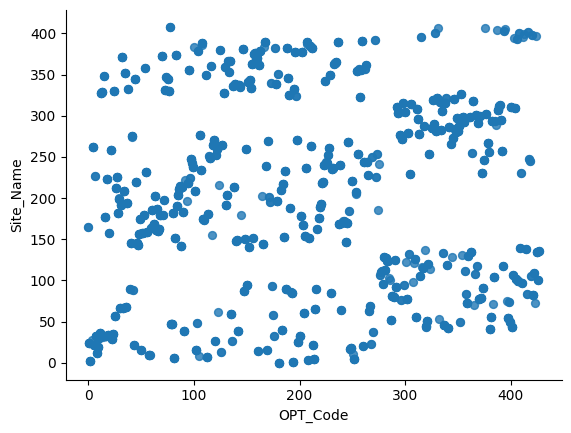

In [18]:
from matplotlib import pyplot as plt
df_pre_k_riders_numerical.plot(kind='scatter', x='OPT_Code', y='Site_Name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

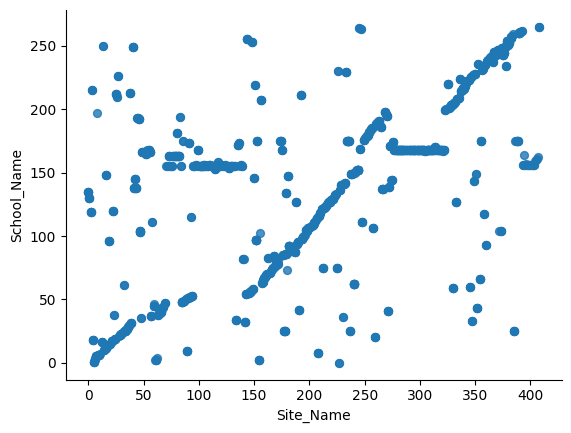

In [17]:
from matplotlib import pyplot as plt
df_pre_k_riders_numerical.plot(kind='scatter', x='Site_Name', y='School_Name', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

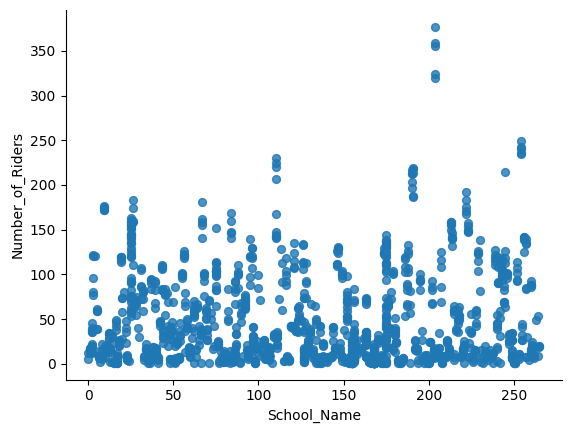

In [16]:
from matplotlib import pyplot as plt
df_pre_k_riders_numerical.plot(kind='scatter', x='School_Name', y='Number_of_Riders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
df_routes_numerical.head()

,School_Year,Route_Number,OPT_Code
0,0,52,75004
1,0,53,75580
2,0,54,75003
3,0,54,75140
4,0,55,75003


from matplotlib import pyplot as plt
_df_0['Route_Number'].plot(kind='hist', bins=20, title='Route_Number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['OPT_Code'].plot(kind='hist', bins=20, title='OPT_Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Route_Number', y='OPT_Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['School_Year']
  ys = series['OPT_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('School_Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('School_Year')
_ = plt.ylabel('OPT_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['School_Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'School_Year'}, axis=1)
              .sort_values('School_Year', ascending=True))
  xs = counted['School_Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('School_Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('School_Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Route_Number']
  ys = series['OPT_Code']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Route_Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Route_Number')
_ = plt.ylabel('OPT_Code')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Route_Number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Route_Number'}, axis=1)
              .sort_values('Route_Number', ascending=True))
  xs = counted['Route_Number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Route_Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Route_Number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Route_Number'].plot(kind='line', figsize=(8, 4), title='Route_Number')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['OPT_Code'].plot(kind='line', figsize=(8, 4), title='OPT_Code')
plt.gca().spines[['top', 'right']].set_visible(False)

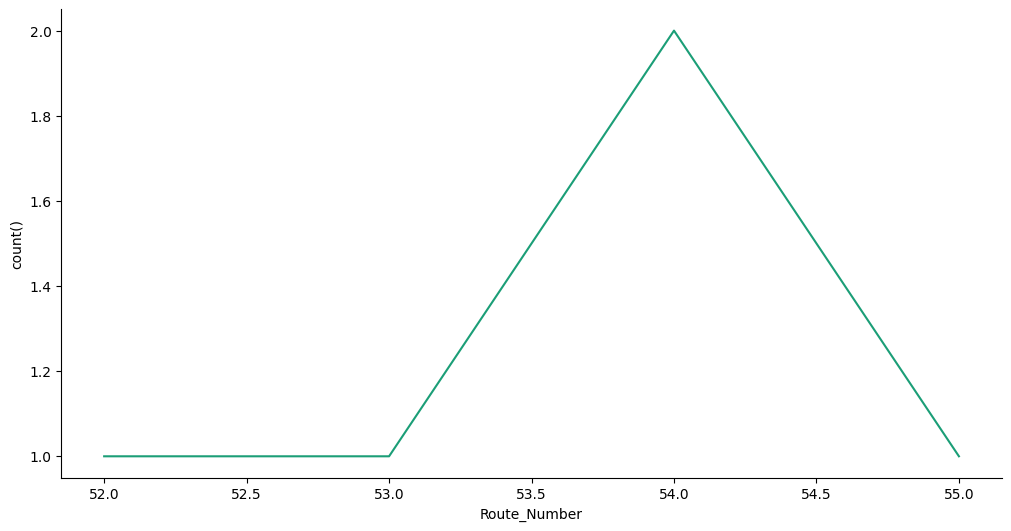

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Route_Number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Route_Number'}, axis=1)
              .sort_values('Route_Number', ascending=True))
  xs = counted['Route_Number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Route_Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Route_Number')
_ = plt.ylabel('count()')

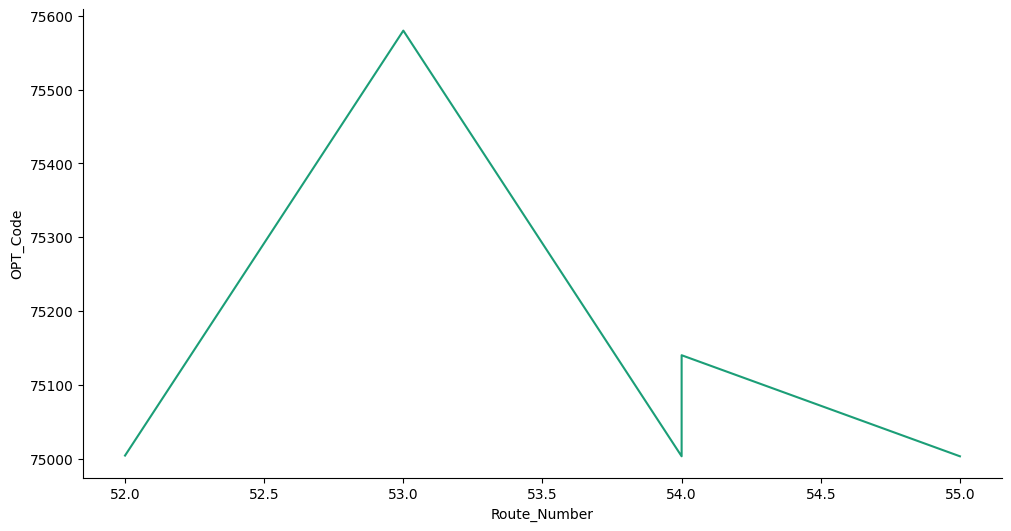

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Route_Number']
  ys = series['OPT_Code']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Route_Number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Route_Number')
_ = plt.ylabel('OPT_Code')

#**Future Scope**

The future scopes for this analysis would be;

1. The solution with which we can help in reducing the traffic both in terms of amount of people using the same route and number of buses using th same route.

2. A solution with which we can optimize the routes and buses running on them to decrease overall traffic.